In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [14]:
# Question a
# imgQ41 meanshift
img41 = cv2.imread('Lab3_images/Lab3_images/imgQ41.jpg')
img413 = cv2.cvtColor(img41,cv2.COLOR_BGR2RGB)
img412 = cv2.resize(img413,(100,100))
img411 = np.reshape(img412,[-1,3])
bandwidth = estimate_bandwidth(img411, quantile=0.2, n_samples=500)
ms41 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms41.fit(img411)
labels41 = ms41.labels_
#labels41 = labels41.reshape((img41.shape[0],img41.shape[1]))

In [15]:
# imgQ42 meanshift
img42 = cv2.imread('Lab3_images/Lab3_images/imgQ42.jpg')
img423 = cv2.cvtColor(img42,cv2.COLOR_BGR2RGB)
img422 = cv2.resize(img423,(100,100))

img421 = np.reshape(img422,[-1,3])
bandwidth = estimate_bandwidth(img421, quantile=0.2, n_samples=500)
ms42 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms42.fit(img421)
labels42 = ms42.labels_
#labels42 = labels42.reshape((img42.shape[0],img42.shape[1]))

In [16]:
# imgQ41 watershed 
img41_water = cv2.cvtColor(img41, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.threshold(img41_water, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh1 = cv2.medianBlur(thresh1, 3)

distance1 = ndi.distance_transform_edt(thresh1)
local_max1 = peak_local_max(distance1, min_distance=5, indices=False,labels = thresh1)
markers1 = ndi.label(local_max1,structure=np.ones((3, 3)))[0]
ws_labels1 = watershed(-distance1, markers1, mask=thresh1)

In [18]:
# imgQ42 watershed
img42_water = cv2.cvtColor(img42, cv2.COLOR_BGR2GRAY)
thresh2 = cv2.threshold(img42_water, 0, 255, cv2.THRESH_BINARY |cv2.THRESH_OTSU)[1]
#thresh2 = cv2.GaussianBlur(thresh2, (3,3),3)

distance2 = ndi.distance_transform_edt(thresh2)
local_max2 = peak_local_max(distance2, min_distance=5, indices=False, footprint=np.ones((3, 3)), labels = thresh2)
markers2 = ndi.label(local_max2)[0]
ws_labels2 = watershed(-distance2, markers2, mask=thresh2)

In [19]:
# Question b
centers41 = ms41.cluster_centers_
center41 = np.uint8(centers41)
res41 = center41[labels41.flatten()]
res41 = res41.reshape((img412.shape))
res41 = cv2.resize(res41,(img41.shape[1],img41.shape[0]))

In [20]:
centers42 = ms42.cluster_centers_
center42 = np.uint8(centers42)
res42 = center42[labels42.flatten()]
res42 = res42.reshape((img422.shape))
res42 = cv2.resize(res42,(img42.shape[1],img42.shape[0]))

In [21]:
def plot_three_images(title,image1, label1, image2, label2, image3, label3):
    fig = plt.figure()
    # Display the original image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)
    
    # Display the watershed image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)
    
    # Display the meanshift image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    plt.savefig('all_' + title)
    plt.show()

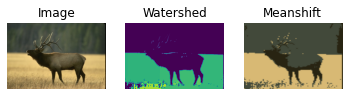

In [22]:
plot_three_images('imgQ41', img413, 'Image', ws_labels1, 'Watershed', res41, 'Meanshift',)

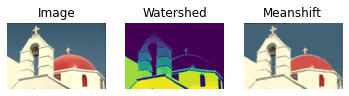

In [23]:
plot_three_images('imgQ42', img423, 'Image', ws_labels2, 'Watershed', res42, 'Meanshift',)